## Description and deliverables




# **PACE stages**


## **Pace: Plan**



### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Our  goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### HR dataset

The dataset that we'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 



Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

1 Stakeholders:
* Primary Stakeholders: Senior Leadership team at Salifort Motors, HR department, and employees.
* Secondary Stakeholders: Data science team, potentially other deparment heads.
2 Objectives:
* Goal: Increase employee retention at Salifort Motors.
* Specific Objectives: Analyze the employee survey data to understand factors influencing retention, build a predictive model, and provide actionable recommendations.

3 Initial Data Observations:
* The dataset includes self-reported information from employees.
* Key features include satisfaction level, last evaluation score, number of projects, average monthly hours, time spent at the company, work accidents, promotion history, department, and salary.
* The target variable is "left", indicating whether an employee left the company.
*Categorical features include "department" and "salary level".
* Data Analysis Environment: Jupyter Notebook with Python in Microsoft Visual Studio Code.
* Librairies: Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn, XGBOOST
* Links:
        Pandas Documentation
        https://pandas.pydata.org/docs/
        NumPy Documentation
        https://numpy.org/doc/
        Matplotlib Documentation
        https://matplotlib.org/stable/index.html
        Seaborn Documentation
        https://seaborn.pydata.org/
        Scikit-learn Documentation
        https://scikit-learn.org/stable/
        XGBOOST
        https://xgboost.readthedocs.io/en/stable/
        Jupyter Notebook
        https://docs.jupyter.org/en/latest/
        Miscrosoft Visual Studio
        https://code.visualstudio.com/docs

4 Ethical Considerations:
  * Privacy: Ensure the confidentiality of employee data, especially when sharing results.
  * Bias: Be cautious about potential biases in the data that might affect model predictions.
  * Transparency: Clearly communicate the limitations of the analysis and any assumptions made.
  * Fairness: Consider fairness in model predictions, espcially when dealing with
    HR-related decisions.

### Import packages

In [6]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.tree import plot_tree

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

### Load dataset



In [7]:
# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)




### Gather basic information about the data

In [8]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [9]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [10]:
# Display all column names
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [11]:
# Rename columns as needed
df0.rename(columns={"Work_accident":"work_accident","Department":"department", "average_montly_hours":"average_monthly_hours","time_spend_company":"tenure"}, inplace=True)

# Display all column names after the update
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

In [12]:
# Check for missing values
missing_values = df0.isna().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Check duplicates

In [13]:
# Check for duplicates
df0.duplicated().sum()



3008

In [14]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [15]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep="first")

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

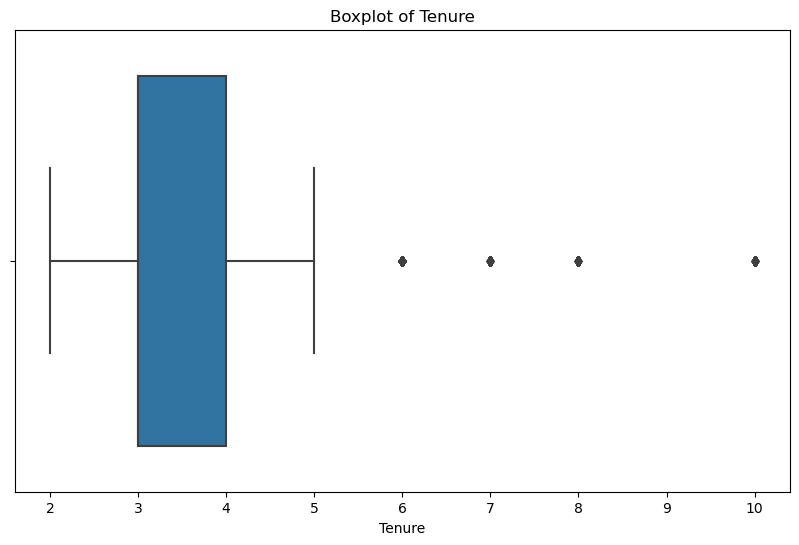

In [16]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10,6))
sns.boxplot(x="tenure", data=df)
plt.title("Boxplot of Tenure")
plt.xlabel("Tenure")
plt.show()




The boxplot above shows that there are outliers in the tenure variable.

It would be helpful to investigate how many rows in the data contain outliers in the tenure column.

In [17]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in "tenure"
percentile25 =df["tenure"].quantile(0.25)
# Compute the 75th percentile value in "tenure"
percentile75 = df["tenure"].quantile(0.75)
# Compute the interquantile range in "tenure"
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in "tenure"
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print("Lower limit: ", lower_limit)
print("Upper limit: ", upper_limit)

# Identify subset of data containing outliers in "tenure"
outliers = df[(df["tenure"]> upper_limit)| (df["tenure"]< lower_limit)]

# Count how many rows in the data contain outliers in "tenure"
print("Number of rows in the data containing outliers in 'tenure' :")
print(len(outliers))

Lower limit:  1.5
Upper limit:  5.5
Number of rows in the data containing outliers in 'tenure' :
824


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



In [18]:
df["left"].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

1. Relationships between Variables:
   In the sales department salary is related to average monthly hours, the number of projects, tenure, and last evalution. However, further analysis are required to determine whethere is relationship is across all the deparment, and if there is significant correlation...
2. The "left" columns indicated that 10,000 or 83% of employees are still with the company while 1991 or 17%  have left the company. 
3. The transformations:
    * Used pandas read_csv function to the dataset HR_capstone_dataset csv file and save as a DataFrame df0.
    * Used the info(), dtypes functions and it was revealed ;df0 contains 10 columns and 1499 rows. Columns department and salary are categorical while the remaning are numercial.
    * Used pandas rename method to correct misspellings column average_montly_hours, rename column time_spend_company  and standardize the column names using the snake_case annotation Work_accident and Department.
    * Used isna() and sum() functions to check for missing values. There were no missing values.
    * Used duplicated() and sum () function to check for duplicates. There were 3008 duplicates.
    * Used the drop_duplicates() and set the argument to keep first.
    * Assigned to result to a new DataFrame df1
    * Used seaborn boxplot function to check for outliers in tenure.
    * The boxplot showed outliers in "tenure"
    * Further invesgated on the number of affected rows by definined upper_limit and lower_limit boundaries.
    * discoverd that "tenure" contains 824 outliers.
4. Purposes of EDA:
    * Identifying patterns and relationships between variables.
    * Detecting outliers and understanding their impact on the analysis.
    * Assessing the distribution of target variables and predictors.
    * Determing potential features for modeling.
    * Handling missing data and deciding on appropriate imputation strategies.
5. Resources Used:
     * Python libraries like Pandas, Seaborn, and Matplotlib for data manipulation and visualization.
     * Pandas Documentation
     * Seaborn Documentation
     * Matplotlib Documentation  
6. Ethical considerations:
     No specific ethical considerations are mentioned, but it's crucial to handle sensitive employee data ethically. Ensure privacy and comply with relevant data protection regulations. Consider potential biases in the data and be transparent about your analysis and modeling choices.




Further Data Exploration (Continue EDA)

How many employees left and what percentage of all employees this figure represents.

In [19]:
# Get numbers of people who left vs. stayed
print(df["left"].value_counts())
print()
# Get percentages of people who left vs. stayed
print(df["left"].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

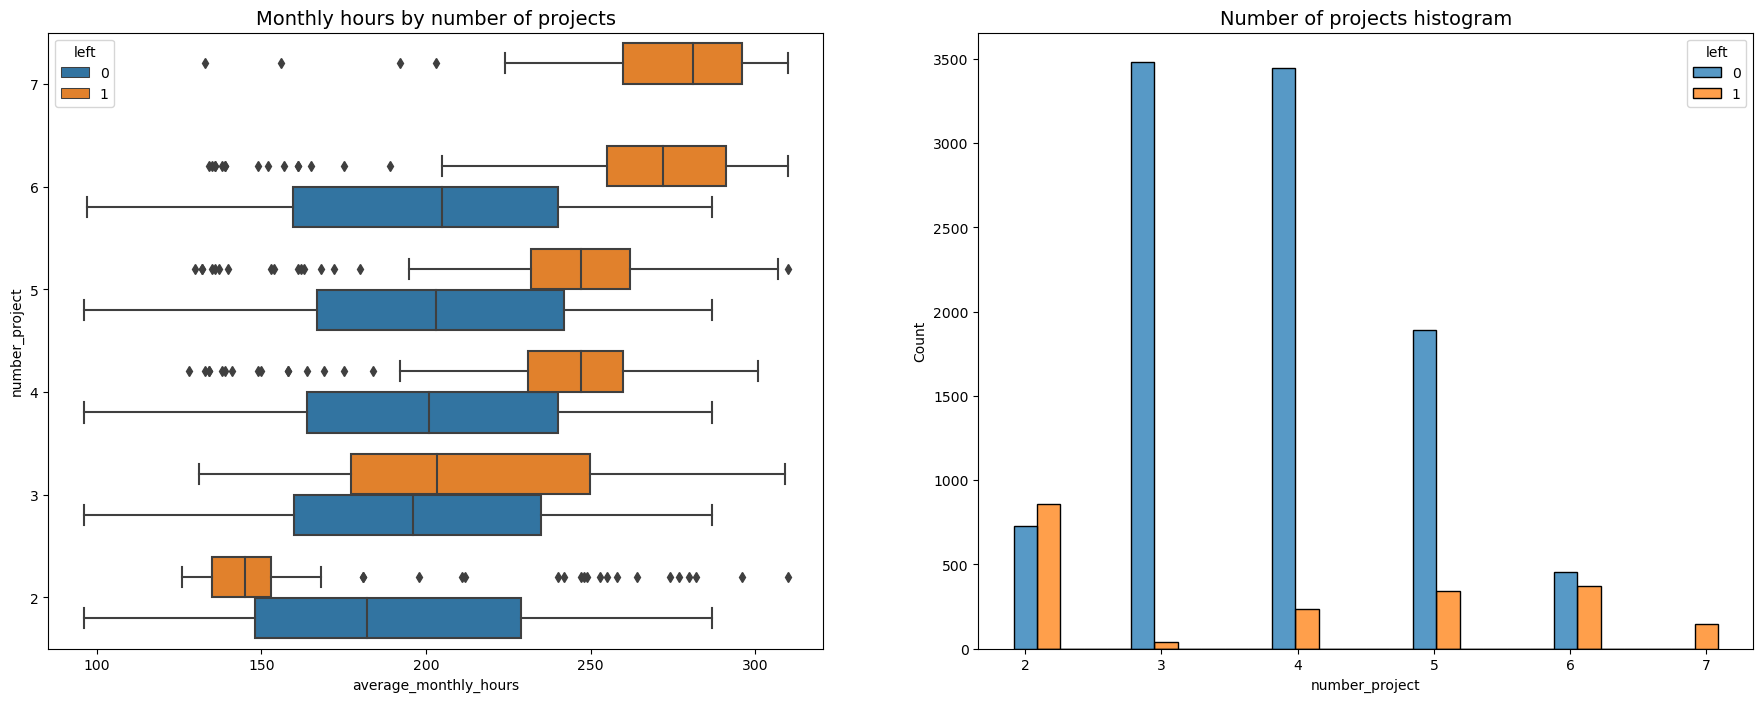

In [20]:
# Create a plot as needed

# Set figure and axes
fig, ax = plt.subplots(1,2, figsize=(22,8))
# Create boxplot showing "averge_monthly_hours" distribution for "number_project"
# comparing employees who stayed vs those who left
sns.boxplot(data=df, x="average_monthly_hours", y="number_project", hue="left", orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Monthly hours by number of projects", fontsize="14")

# Create histogram showing distribution of "number_project", comparing employees who stayed vs those who left
tenure_stay=df[df["left"]==0]["number_project"]
tenure_left=df[df["left"]==1]["number_project"]
sns.histplot(data=df, x="number_project", hue="left", multiple="dodge",shrink=2,ax=ax[1])
ax[1].set_title("Number of projects histogram", fontsize="14")

# Display the plots
plt.show()


It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.


In [21]:
# Get value counts of stayed/left for employees with 7 projects
df[df["number_project"]==7]["left"].value_counts()

left
1    145
Name: count, dtype: int64

This confirms that all employees with 7 projects did leave.

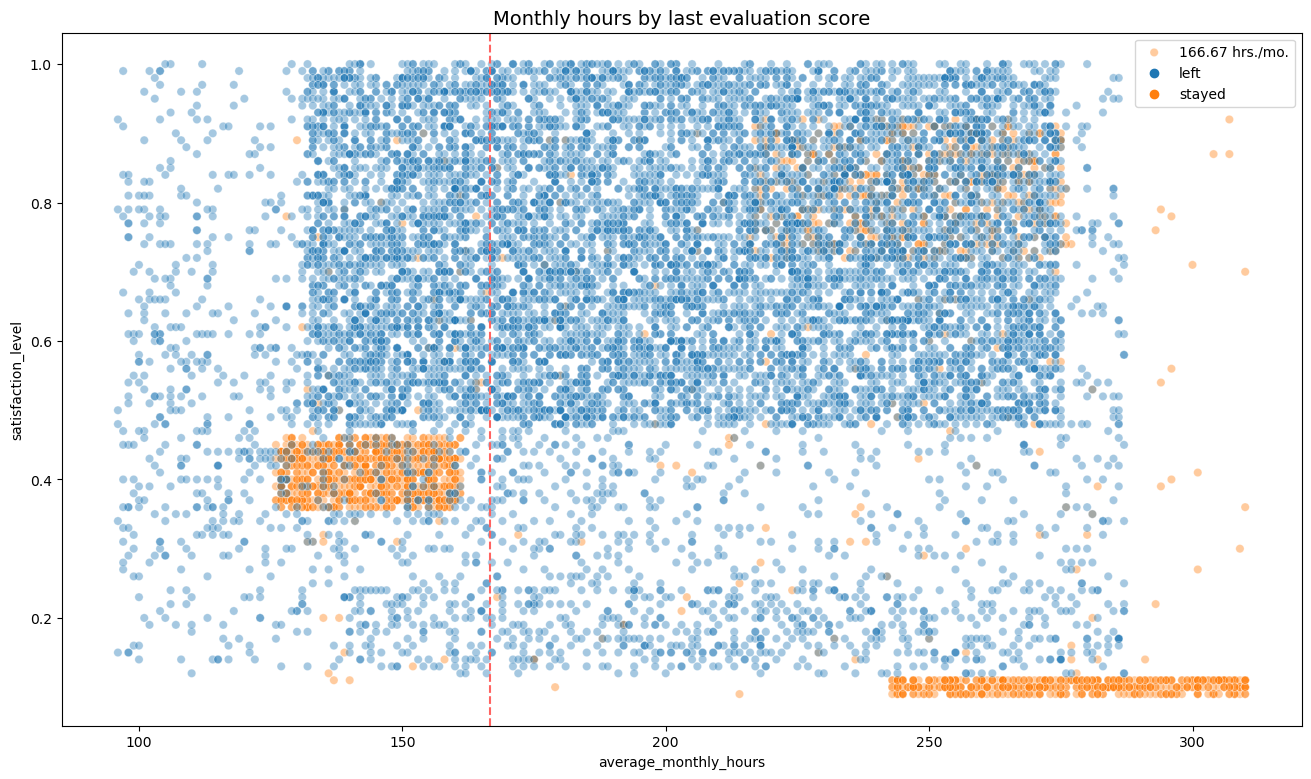

In [22]:
# Create scatterplot of "average_monthly_hours" vs "satisfaction_level"
# comparing employees who stayed vs those who left.
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x="average_monthly_hours", y="satisfaction_level", hue="left",alpha=0.4)
plt.axvline(x=166.67, color="#ff6361", label="166.67 hrs./mo.",ls="--")
plt.legend(labels=["166.67 hrs./mo.","left","stayed"])
plt.title("Monthly hours by last evaluation score", fontsize="14");

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.



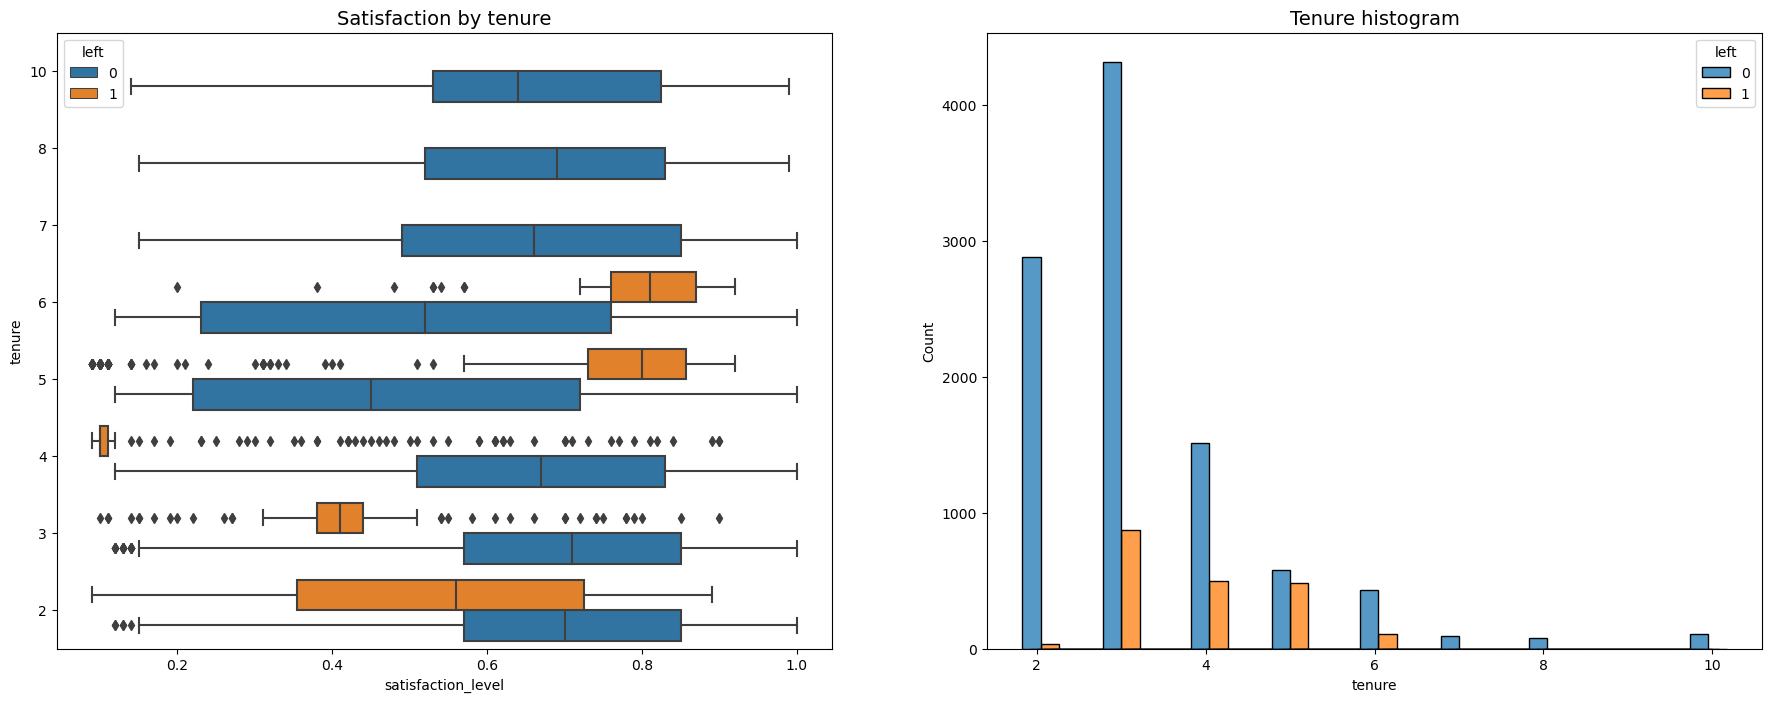

In [23]:
# Set figure and axes
fig, ax = plt.subplots(1,2,figsize=(22,8))

# Create boxplot showing distributions of "satisfaction_level" by tenure,
# comparing employees who stayed vs those who left.
sns.boxplot(data=df, x= "satisfaction_level", y="tenure", hue="left", orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Satisfaction by tenure", fontsize="14")

# Create histogram showing distribution of "tenure"
# comparing employees who stayed vs those who left
tenure_stay = df[df["left"]==0]["tenure"]
tenure_left = df[df["left"]==1]["tenure"]
sns.histplot(data=df, x="tenure", hue="left", multiple="dodge", shrink=5, ax=ax[1])
ax[1].set_title("Tenure histogram", fontsize="14")

plt.show();

* Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
* Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
* The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
* The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

In [24]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df.groupby(["left"])["satisfaction_level"].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


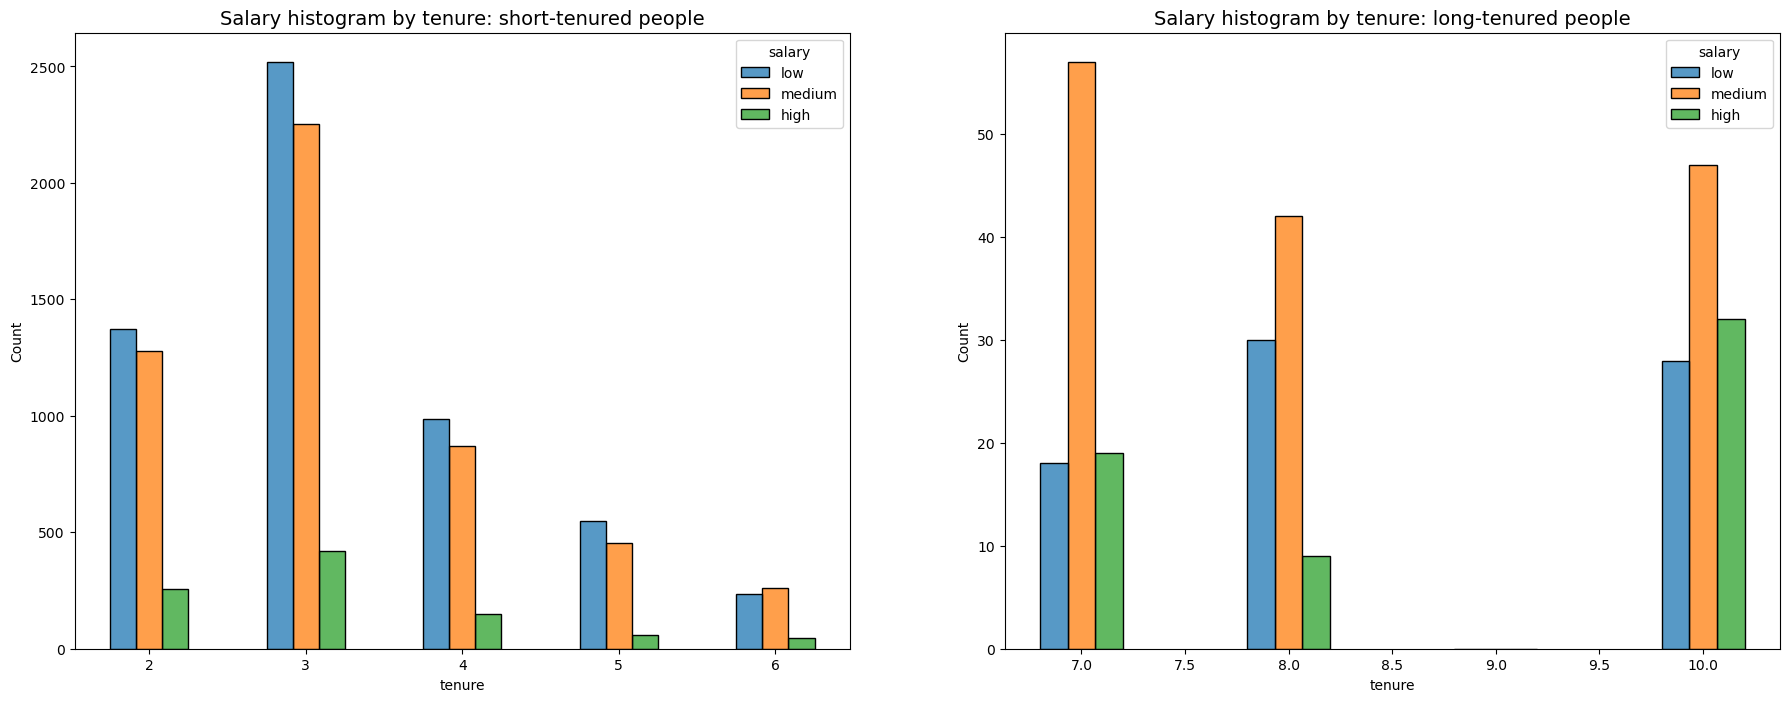

In [25]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df[df['tenure'] < 7]

# Define long-tenured employees
tenure_long = df[df['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

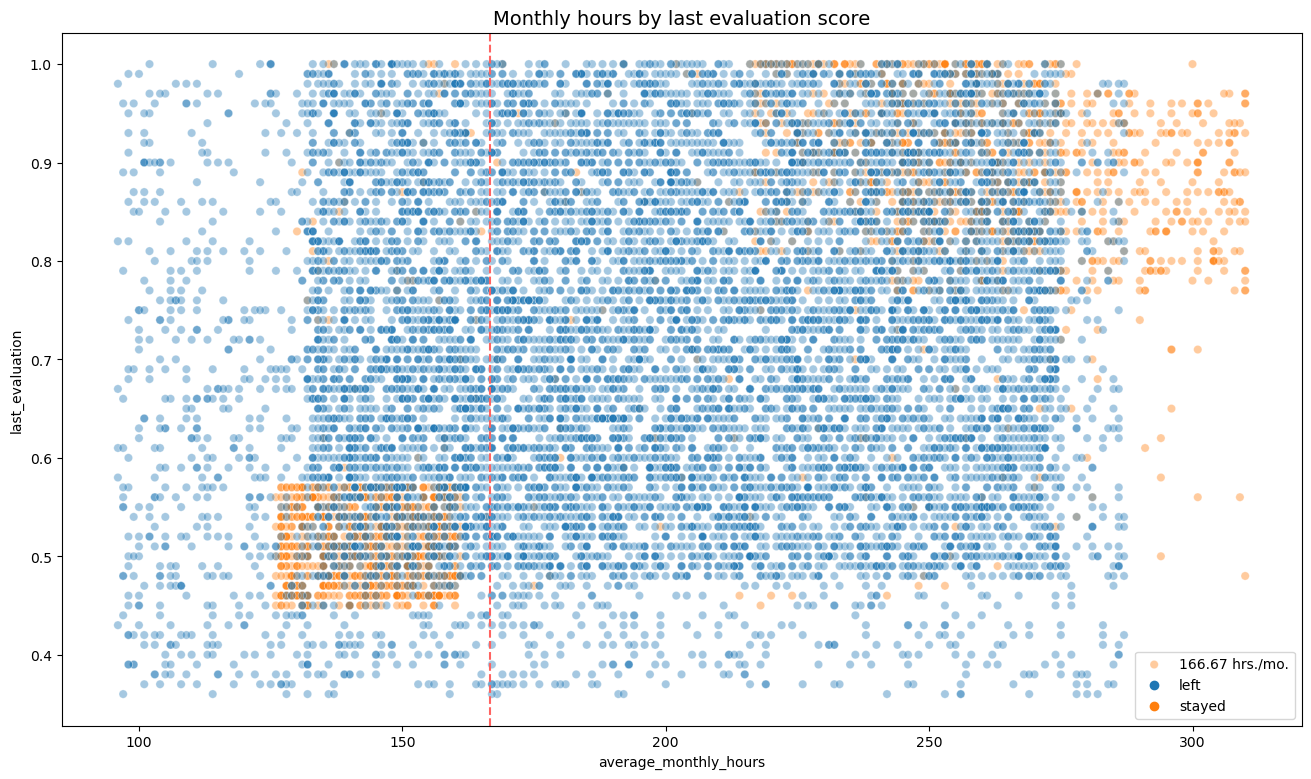

In [26]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

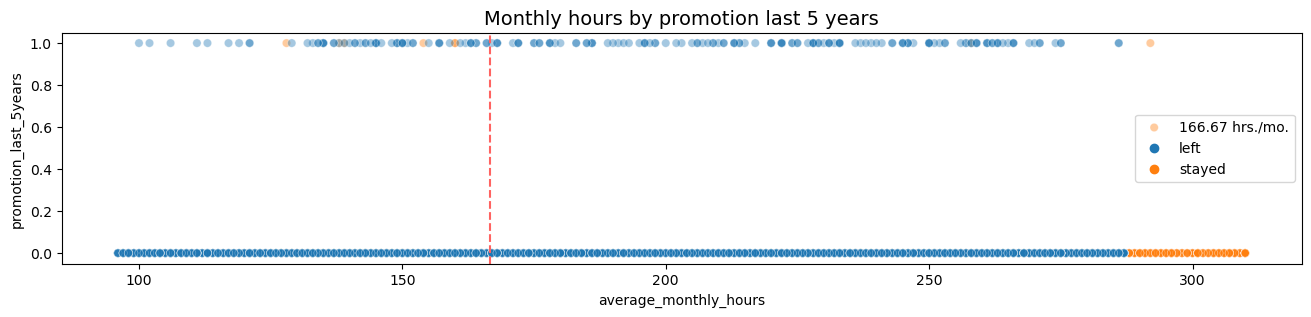

In [27]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');


The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

In [28]:
# Display counts for each department
df["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

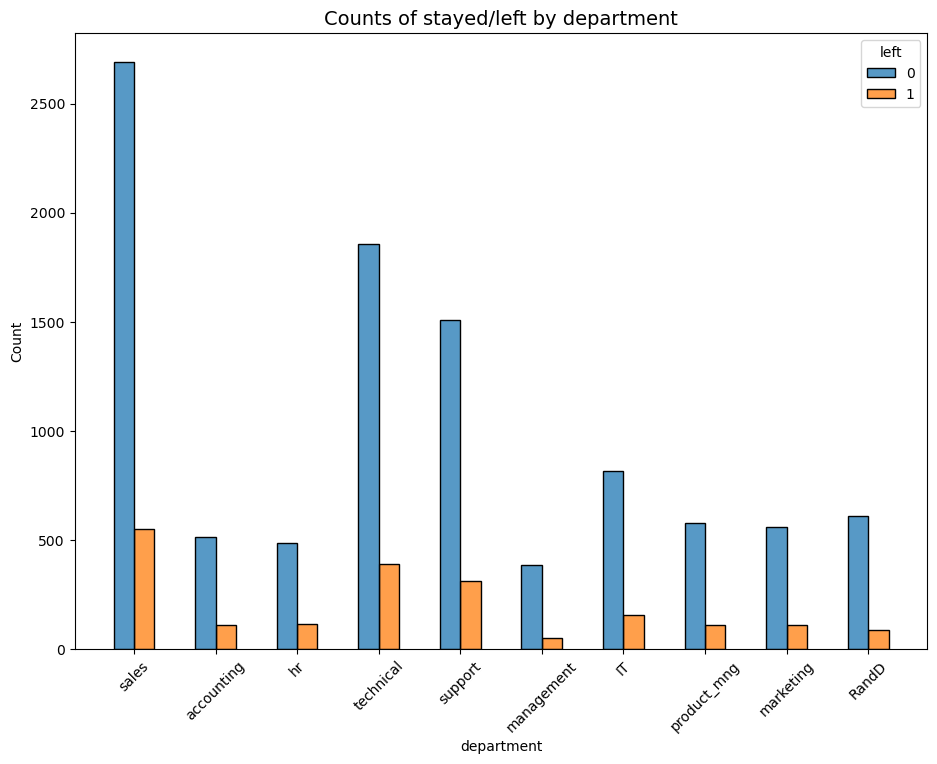

In [29]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

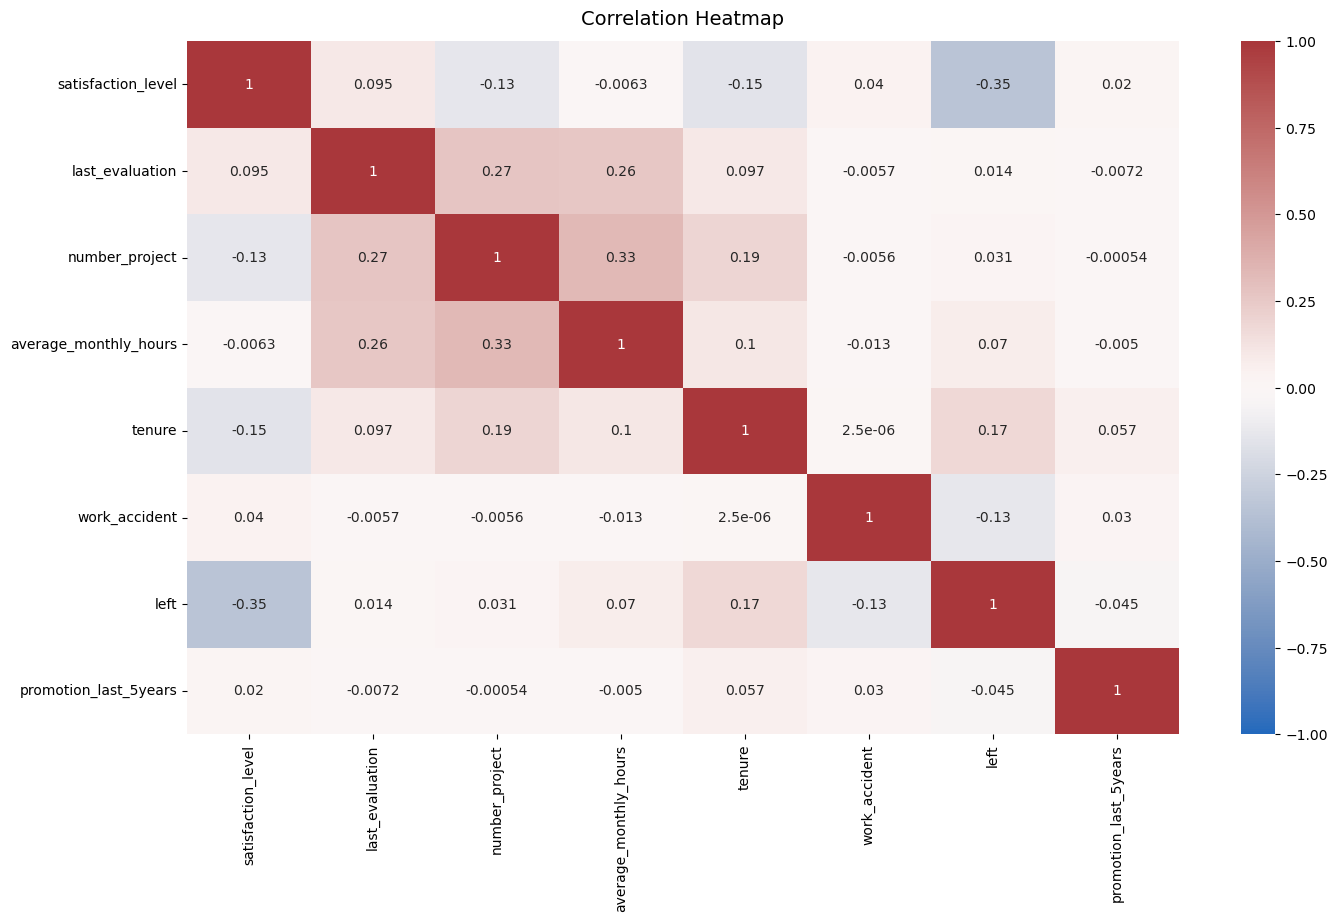

In [30]:
# Selecting only numeric columns for the correlation heatmap
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df[numeric_columns].corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);


The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well the model fits the data


1. **Notice**
   - One potential point to explore further is the observation about the distribution shape, indicating potential data manipulation or synthetic data. It's essential to investigate and ensure data integrity for reliable modeling.

2. **Choosen Independent variables**
   - Relevant independent variables for predicting "left" could include factors such as satisfaction level, number of projects, average monthly hours, time spent at the company, work accidents, and promotion in the last 5 years. These were identified as influential in understanding employee turnover.

3. **The assumptions**
   - Decision tree models, are less sensitive to assumptions like linearity or normality. However, it's crucial to ensure that the chosen features are appropriate, and the model doesn't overfit or underfit the data.

4. **Model Fitness**
   - Model fit will be assessed during training and evaluation. Given the complexity of employee turnover, a decision tree model that can capture non-linear relationships and interactions among features.

5. **Model Improvement**
   - Regular model evaluation, feature importance analysis, and potentially hyperparameter tuning could improve the model. Additionally, addressing potential data irregularities identified earlier could enhance model performance.

6. **Resources**
   - Resources may include, scikit-learn documentation (https://scikit-learn.org/stable/documentation.html), and relevant literature on decision tree models and employee turnover prediction.

7. **Ethical considerations in this stage**
   - Ethical considerations may include ensuring the fair treatment of employees in model development, avoiding biases, and being transparent about the model's purpose. Additionally, addressing potential burnout or workplace issues identified in the analysis could be part of an ethical approach.

 

## Model Building
- Fit a model that predicts the outcome variable using the independent variables
- Check model assumptions
- Evaluate the model

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable.
So this task involves classification. More specifically, this involves binary classification, since the outcome variable "left" can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the variable to predict "left" is categorical a Tree-based Machine Learning model will fit.

### Modeling



In [31]:
# Convert the object predictor variables to numerical dummies
df_dummies= pd.get_dummies(df,columns=["department","salary"])

In [32]:
# Isolate the outcome variable
y = df_dummies["left"]

# Display the first few rows of "y"
y.head()


0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Select the features

In [33]:
# Select the features
X = df_dummies.drop("left", axis=1)
# Display the first few rows of "X"
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False


Split the data into training, validating, and testing sets.

In [34]:
# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, stratify=y, random_state=0)

### Decision tree

Constructing a decision tree model and setting up cross-validated grid-search to exhaustively search for the best model parameters.
 

In [35]:
# Instantiate model
tree= DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params= {"max_depth":[4,6,8,None],
            "min_samples_leaf":[2,5,1],
            "min_samples_split":[2,4,6]
            }

# Assign a list of scoring metrics to capture
scoring = ["accuracy", "precision","recall","f1","roc_auc"]
# Instantiate GridSearch

tree1 = GridSearchCV(tree,cv_params,scoring=scoring,cv=4,refit="roc_auc")


### Fitting the decision tree model to the training data

In [36]:
%%time
tree1.fit(X_train,y_train)

CPU times: total: 7.17 s
Wall time: 11.1 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

### Optimal values for the decision tree parameters

In [37]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

### Best AUC score achieved by the decision tree model on the training set.

In [38]:
tree1.best_score_

0.969819392792457

#### This is a strong AUC score, which shows that this model can predict employees who will leave very well.

In [39]:
# Extract all the scores from the grid search.

def make_results(model_name:str,model_object,metric:str):
    '''
    Arguments:
        model_name (string): the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''
    # Create a dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict={"auc":"mean_test_roc_auc",
                 "precision":"mean_test_precision",
                 "recall":"mean_test_recall",
                 "f1":"mean_test_f1",
                 "accuracy":"mean_test_accuracy"
                 }
    # Get all the results from the CV and put them in a df
    cv_results=pd.DataFrame(model_object.cv_results_)
    # Isolate the row of the df with the max(metrics) score
    best_estimator_results =cv_results.iloc[cv_results[metric_dict[metric]].idxmax(),:]
    # Extract Accuracy, Precision, Recall, and F1 score from that row
    auc= best_estimator_results.mean_test_roc_auc
    f1= best_estimator_results.mean_test_f1
    recall= best_estimator_results.mean_test_recall
    precision= best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table= pd.DataFrame()
    table= pd.DataFrame({"model":[model_name],
                         "precision":[precision],
                         "recall":[recall],
                         "F1":[f1],
                         "accuracy":[accuracy],
                         "auc":[auc]
                         })
    return table

##### Use the function above to get all the scores from grid search

In [40]:
# Get all CV scores
tree1_cv_results = make_results("decision tree cv", tree1, "auc")
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


All of these scores from the decision tree model are strong indicators of good model performance. Since decision trees can be overfit, we will use a random forest next.


## Random Forest
Constructing a random forest model and set up cross-validated grid-search to exhaustively search for the best model parameters.

In [41]:
# Instantiate model
rf= RandomForestClassifier(random_state=0)
# Assign a dictionray of hyperparameters to search over
cv_params = {"max_depth": [3,5, None], 
             "max_features": [1.0],
             "max_samples": [0.7, 1.0],
             "min_samples_leaf": [1,2,3],
             "min_samples_split": [2,3,4],
             "n_estimators": [300, 500],
             }  

# Assign a list of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit="roc_auc")

Fitting the random foest model to the training data.

In [42]:
%%time
rf1.fit(X_train,y_train)

CPU times: total: 32min 39s
Wall time: 46min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Specify path to save the model

Define functions to pickle the model and read in the model.

In [82]:
def write_joblib(path, model_object, save_as):
    '''
    In: 
        path:         path of folder where to save the joblib file
        model_object: a model to save
        save_as:      filename to save the model

    Out: A call to save the model in the folder indicated
    '''   
    with open(path + save_as + ".joblib", "wb") as to_write:
        joblib.dump(model_object, to_write)

In [83]:
def read_joblib(path, saved_model_name):
    '''
    In: 
        path:             path to folder to read from
        saved_model_name: filename of joblib file to read in

    Out: 
        model: the loaded model 
    '''
    with open(path + saved_model_name + ".joblib", "rb") as to_read:
        model = joblib.load(to_read)
    return model     

Use the functions defined above to save the model in a pickle file and then read it in.

In [84]:
# Write pickle
write_joblib(path, rf1, "hr_rf1")

In [85]:
# Read pickle
rf1 = read_joblib(path, "hr_rf1")

Identify the best AUC socre achieved by the random forest model on the training set

In [48]:
# Check best AUC score on CV
rf1.best_score_

0.9804530056916747

Identify the optimal value for the parameters of the random forest model.

In [49]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [50]:
# Get all CV scores
rf1_cv_results = make_results("random forest cv", rf1, "auc")
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.949362  0.915614  0.932151  0.977872  0.980453


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (recall score of the random foest is approximately 0.001 lowerm which is a negligible amount). This indicates that the random forest model mostly outperform the decision tree model.

#### Evaluation of the final model on the test set.

Define a function that gets all the scores from a model's predictions.

In [51]:
def get_scores(model_name:str,model,X_test_data,y_test_data):
      '''
    Generate a table of test scores.

    In: 
        model_name (string):  Model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for the model
    '''
      preds = model.best_estimator_.predict(X_test_data)
      auc = roc_auc_score(y_test_data , preds )
      accuracy= accuracy_score(y_test_data , preds )
      precision= precision_score(y_test_data , preds )
      recall = recall_score(y_test_data , preds )
      f1 = f1_score(y_test_data , preds )

      table = pd.DataFrame({'model': [model_name],
                            'precision': [precision], 
                            'recall': [recall],
                            'f1': [f1],
                            'accuracy': [accuracy],
                            'AUC': [auc]
                          })
    
      return table

The best performing model to predict on the test set.

In [52]:
# Get predictions on test data
rf1_test_scores = get_scores("random forest1 test", rf1, X_test,y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model. The model's performance on this data is representative of how it will perform on the new, unseen data.

There is a chance that there is some data leakage occurring. 

#### Feature engineering

In [53]:
# Drop "satisfaction_level" and save resulting dataframe in ew variable.
df1=df_dummies.drop("satisfaction_level", axis=1)

# Display first few rows of new dataframe
df1.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.53,2,157,3,0,1,0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.86,5,262,6,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.88,7,272,4,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.87,5,223,5,0,1,0,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.52,2,159,3,0,1,0,False,False,False,False,False,False,False,True,False,False,False,True,False


In [54]:
# Create "overworked" column.
df1["overworked"]=df1["average_monthly_hours"]
 # Inspect max and min average monthly hours values
print("Max hours:", df1["overworked"].max())
print("Min hours: ", df1["overworked"].min())

Max hours: 310
Min hours:  96


166.67 is approximately the averahe number of monthly hours for some who works 50 weeks per year, 5 days per week, 8 hours per day.


In [55]:
# Drop the average_monthly_hours column
df1=df1.drop("average_monthly_hours",axis=1)
# Display first few rows of resulting dataframe
df1.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,overworked
0,0.53,2,3,0,1,0,False,False,False,False,False,False,False,True,False,False,False,True,False,157
1,0.86,5,6,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,True,262
2,0.88,7,4,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,True,272
3,0.87,5,5,0,1,0,False,False,False,False,False,False,False,True,False,False,False,True,False,223
4,0.52,2,3,0,1,0,False,False,False,False,False,False,False,True,False,False,False,True,False,159


Isolate the features and target variables

In [56]:
# Iscolate the outcome variables

y=df1["left"]
# Select the fatures
X=df1.drop("left",axis=1)


Split the data into training and test sets

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, stratify=y,random_state=0)

#### Decison tree -Round 2

In [58]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [59]:
%%time
tree2.fit(X_train,y_train)

CPU times: total: 4.8 s
Wall time: 6.64 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [60]:
# Check best AUC score on CV
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [61]:
# Check best AUC score on CV
tree2.best_score_

0.9644274318647762

This model performs very well, even without satisfaction levels and detailed hours worked data

In [62]:
# Get all CV scores
tree2_cv_results = make_results("decision tree2 cv", tree2, "auc")
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.902176  0.904894  0.903168  0.967752  0.964427


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

##### Random forest - Round 2

In [63]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [64]:
%%time
rf2.fit(X_train,y_train)

CPU times: total: 25min 38s
Wall time: 29min 20s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [86]:
# write joblib
write_joblib(path, rf2, "hr_rf2")


In [87]:
# Read in joblib
rf2= read_joblib(path,"hr_rf2")

In [88]:
# Check best params
rf2.best_params_


{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [68]:
# Check best AUC socre on CV
rf2.best_score_

0.9739987589186296

In [69]:
# gett all CV scores
rf2_cv_results = make_results("random forest2 cv", rf2, "auc")
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.902176  0.904894  0.903168  0.967752  0.964427
               model  precision    recall       F1  accuracy       auc
0  random forest2 cv   0.906207  0.904892  0.90547  0.968642  0.973999


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric. Score the champion model on the test set now.

In [70]:
# Get predictions on test data
rf2_test_scores = get_scores("random forest2 test", rf2,X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.910931,0.903614,0.907258,0.969313,0.943007


This seems to be a stable, well-performing final model.
Plot a confusion matrix to visualize how well it predicts on the test set.

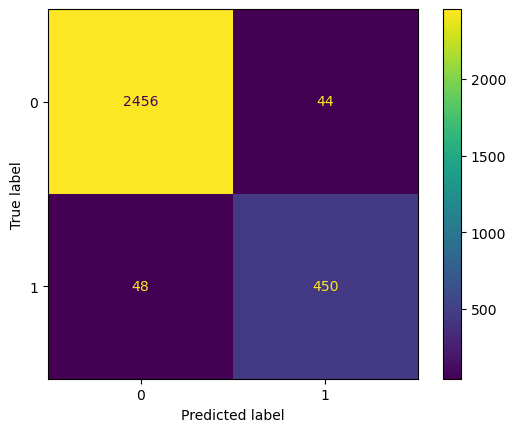

In [71]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model. 

Decision tree splits

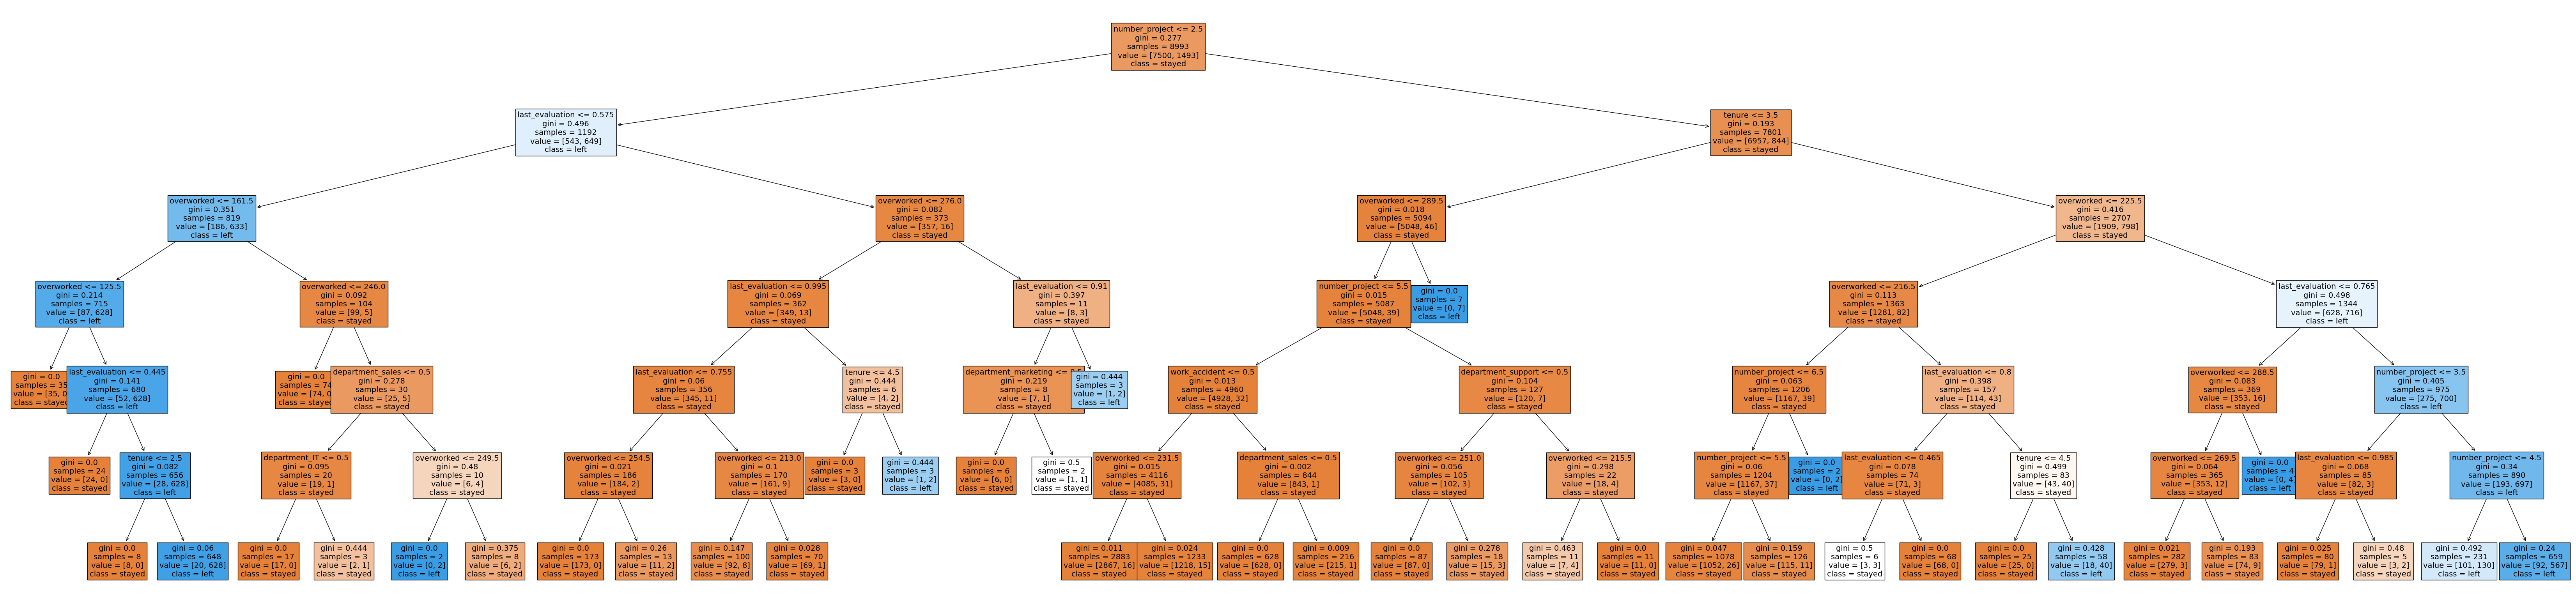

In [72]:
# Plot the tree
plt.figure(figsize=(85, 20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=list(X.columns), 
          class_names=['stayed', 'left'], filled=True);
plt.show()

#### Decision tree feature importance


In [73]:
# Tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=list(X.columns))
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                columns=["gini_importance"],
                                index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by="gini_importance", ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances["gini_importance"] !=0]
tree2_importances

,gini_importance
last_evaluation,0.297664
overworked,0.271540
number_project,0.264194
tenure,0.164621
department_sales,0.000840
department_support,0.000437
department_marketing,0.000384
department_IT,0.000290
work_accident,0.000029


A barplot to visualize the decision tree feature importances.

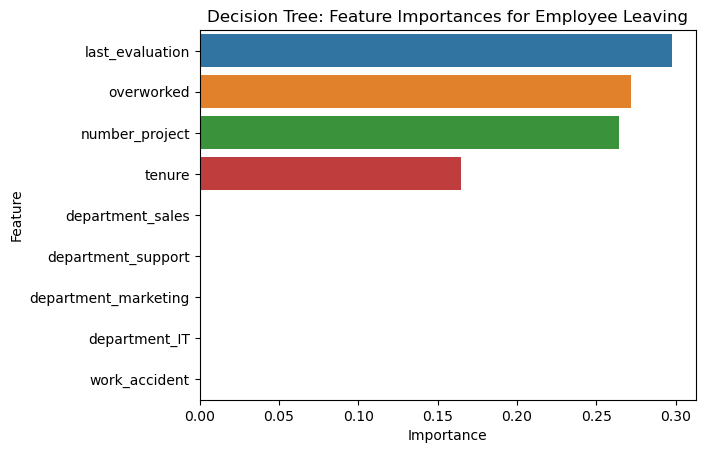

In [74]:
sns.barplot(data= tree2_importances, x="gini_importance", y=tree2_importances.index, orient="h")
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, last_evaluation,number_project,tenure,and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

#### Random forest feature importance

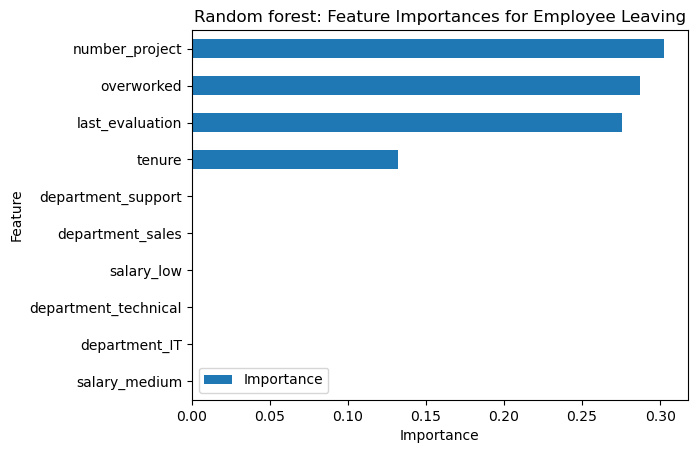

In [75]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_
# Get indices of top 10 features
ind= np.argpartition(rf2.best_estimator_.feature_importances_,-10)[-10:]
# get column lables of top 10 features
feat = X.columns[ind]
# Filter "feat_impt" to consist of top 10 feature importances
feat_impt = feat_impt[ind]
y_df = pd.DataFrame({"Feature":feat, "Importance": feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)
y_sort_df.plot(kind="barh",ax=ax1, x="Feature", y="Importance" )
ax1.set_title("Random forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders




## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.







**1. Key insights emerged from the models**
   - The decision tree and random forest models have demonstrated strong performance in predicting employee attrition.
   - Key Metrics:
     - Decision Tree:
       - Precision: 0.902
       - Recall: 0.905
       - F1 Score: 0.903
       - Accuracy: 0.968
       - AUC: 0.964
     - Random Forest:
       - Precision: 0.906
       - Recall: 0.905
       - F1 Score: 0.905
       - Accuracy: 0.969
       - AUC: 0.974
   - Features contributing to attrition: Last evaluation, number of projects, tenure, and "overworked."

**2. Business recommendations to propose based on the models built**
   - Develop a targeted workload management program to address employees labeled as "overworked" by providing additional support or redistributing tasks.
   - Implement periodic performance evaluations and feedback sessions, with a focus on employees with lower last evaluation scores.
   - Consider offering professional development opportunities to employees with a high number of projects to prevent burnout.

**3. Potential recommendations  for managers/company**
   - Establish a comprehensive employee well-being program addressing workload concerns and offering mental health support.
   - Conduct department-specific analyses to tailor retention strategies based on the unique challenges faced by different teams.
   - Institute a mentorship program to enhance employee satisfaction, especially for those with longer tenure.

**4. Model Improvement Opportunities**
   - While the model performs well, continuous improvement is possible. Regular updates based on new data and additional features could enhance predictive accuracy.
   - Consider exploring other advanced techniques, such as hyperparameter tuning or ensemble methods, to optimize model performance.

**5. Further investigations**
   - Investigate the impact of specific roles on employee turnover.
   - Examine the influence of work accidents on attrition.
   - Assess the effectiveness of any implemented retention strategies.

**6. Resources used**
   - The resources for model evaluation and interpretation include documentation for [scikit-learn](https://scikit-learn.org/stable/), [seaborn](https://seaborn.pydata.org/), and [matplotlib](https://matplotlib.org/).

**7. Ethical considerations in this stage**
   - Ethical considerations may include ensuring fair treatment of employees based on model predictions.
   - Transparency and communication about how the model is used and decisions made are crucial to maintaining trust.



## Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 96.64%, precision of 90.20%, recall of 90.5%, f1-score of 90.03%, and accuracy of 96.8%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 



In [76]:
!voila salifort_ml.ipynb

^C
